## Digital Image Processing


In [0]:
from cv2 import filter2D
import matplotlib.pyplot as plt
import numpy as np
import cv2

from PIL import Image
import requests
from io import BytesIO

In [0]:
def plot(img,k,title='original',title2=''):
  kernel = np.array(k)
  filtered = filter2D(img, 0, kernel)
  f, ax = plt.subplots(1, 2, figsize=(12, 12))
  ax[0].imshow(img, cmap = 'gray')
  ax[0].set_title(title)
  ax[0].axis('off')
  ax[1].imshow(filtered, cmap = 'gray')
  ax[1].set_title(title2)
  ax[1].axis('off')
  plt.show()

In [0]:
def plot_images(imgs,labels,n):
  f, ax = plt.subplots(1, n, figsize=(12, 15))
  for i in range(n):
    ax[i].imshow(imgs[i], cmap = 'gray')
    ax[i].set_title(labels[i])
    ax[i].axis('off')
  plt.show()

##Original Image

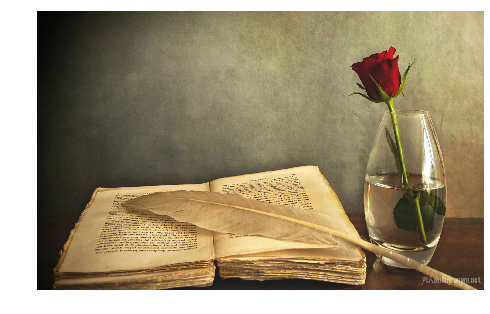

In [4]:
img = Image.open("1.jpg")

img = np.array(img)
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.show()

##Contrast Stretching

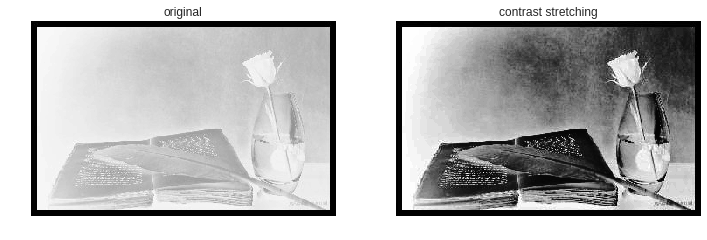

In [5]:
img = cv2.imread('4.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ))
plot_images([img,equ],["original","contrast stretching"],2)

##Adding noise 

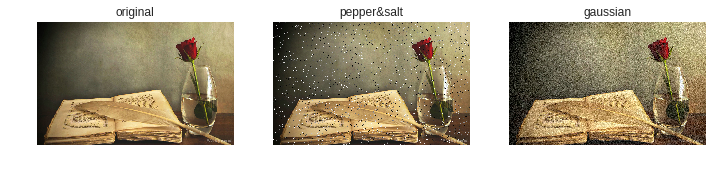

In [6]:
from PIL import Image
import numpy as np
from imgaug import augmenters as iaa


%matplotlib inline

img = Image.open("1.jpg")
img_arr = np.asarray(img)

gaussian_noise = iaa.AdditiveGaussianNoise(loc=0, scale=0.1*255)

pepper_salt= iaa.SaltAndPepper(p=0.05)

gauss_noise = gaussian_noise.augment_image(img_arr)
pepper_noise = pepper_salt.augment_image(img_arr)

p = Image.fromarray(pepper_noise).convert('RGB')
g = Image.fromarray(gauss_noise).convert('RGB')
plot_images([img,p,g],["original","pepper&salt","gaussian"],3)

## Some Image transformation kernels


## Sharpen Kernel


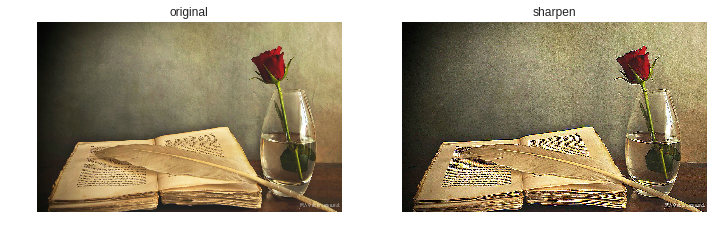

In [7]:
sharpen = [ 0, -1,  0,
           -1,  5, -1,
            0, -1,  0]

plot(img_arr,sharpen,title2="sharpen")

## Gaussian blurs




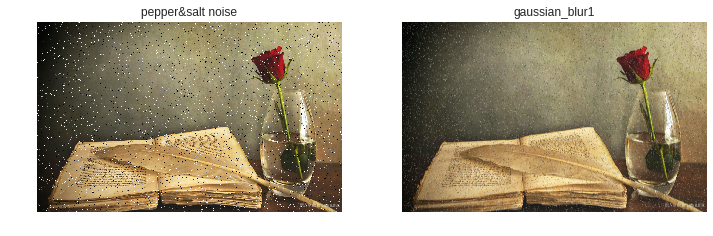

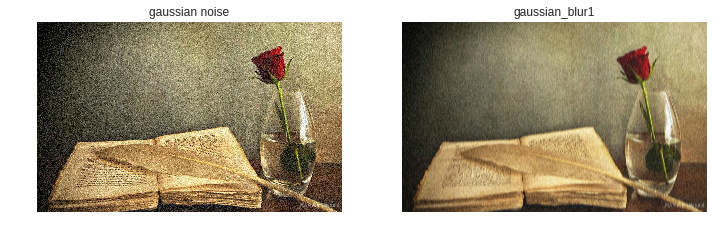

In [8]:
gaussian_blur1 = [1, 2, 1,
                  2, 4, 2,
                  1, 2, 1]

gaussian_blur1 = [1/16 * i for i in gaussian_blur1]

gaussian_blur2 = [1,  4,  6,  4, 1,
                  4, 16, 24, 16, 4,
                  6, 24, 36, 24, 6,
                  4, 16, 24, 16, 4,
                  1,  4,  6,  4, 1,]

gaussian_blur2 = [1/256 * i for i in gaussian_blur2]

plot(pepper_noise,gaussian_blur1,"pepper&salt noise","gaussian_blur1")
plot(gauss_noise,gaussian_blur2,"gaussian noise","gaussian_blur1")

## horizontal and vertical lines


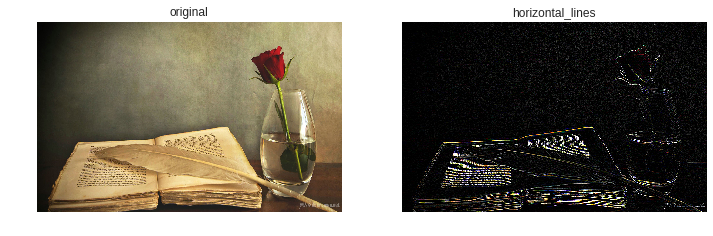

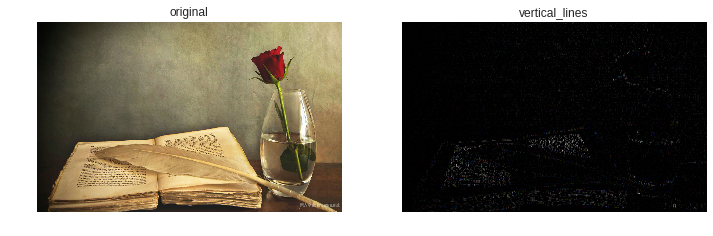

In [9]:
horizontal_lines = [-1, -1, -1,
                     2,  2,  2,
                    -1, -1, -1]

vertical_lines = [-1, 2, -1,
                  -1, 2, -1,
                  -1, 2, -1]

plot(img_arr, horizontal_lines,"original","horizontal_lines")
plot(img_arr, vertical_lines,"original","vertical_lines")

## box blur


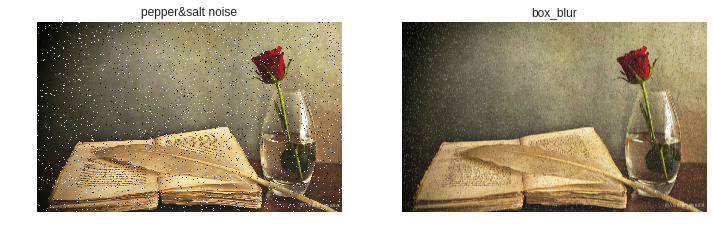

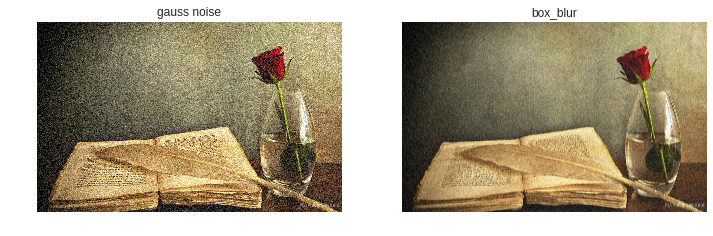

In [10]:
box_blur = [1, 1, 1,
            1, 1, 1,
            1, 1, 1]

box_blur = [1/9 * i for i in box_blur]
plot(pepper_noise,box_blur,"pepper&salt noise","box_blur")
plot(gauss_noise,box_blur,"gauss noise","box_blur")

## edges


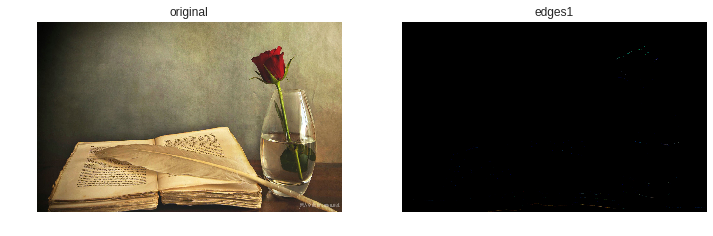

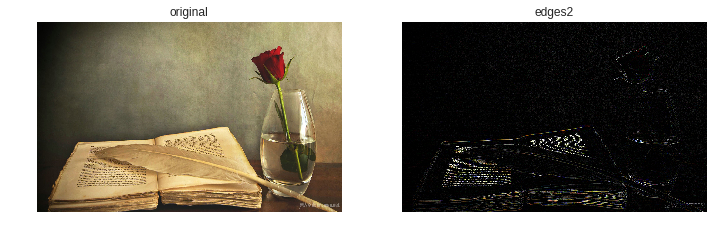

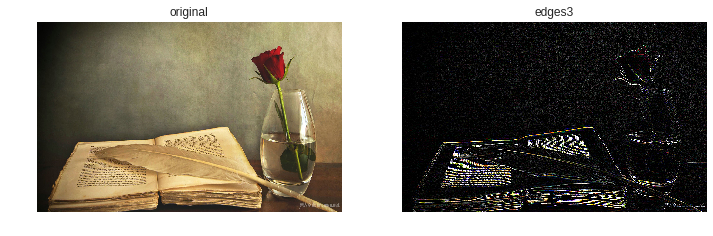

In [11]:
edge1 = [1, 0, -1,
         0, 0, 0,
         -1, 0, 0]

edge2 = [0,  1, 0,
         1, -4, 1,
         0,  1, 0]

edge3 = [-1, -1, -1,
         -1,  8, -1,
         -1, -1, -1]

plot(img_arr,edge1,"original","edges1")
plot(img_arr,edge2,"original","edges2")
plot(img_arr,edge3,"original","edges3")

## Subtraction


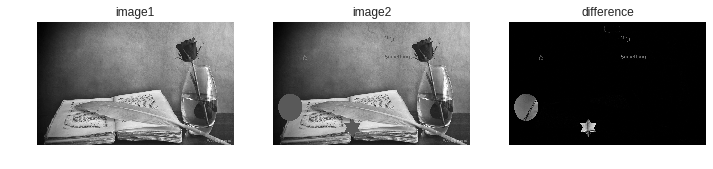

In [12]:
img1 = cv2.imread("1.jpg",0)
img1 = np.array(img1)
img2 = cv2.imread("2.jpg",0)
img2 = np.array(img2)

dif = cv2.absdiff(img1,img2)

plot_images([img1,img2,dif],["image1","image2","difference"],3)

##Thresholding

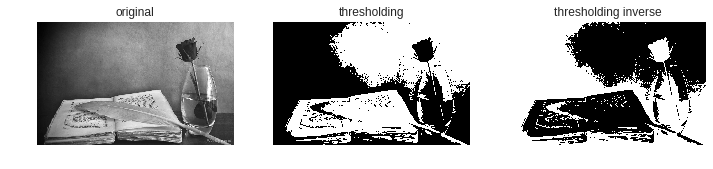

In [13]:
img1 = cv2.imread("1.jpg",0)

ret,thresh1 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY_INV)
  
plot_images([img1,thresh1,thresh2],["original","thresholding","thresholding inverse"],3)

## Adaptive thresholding

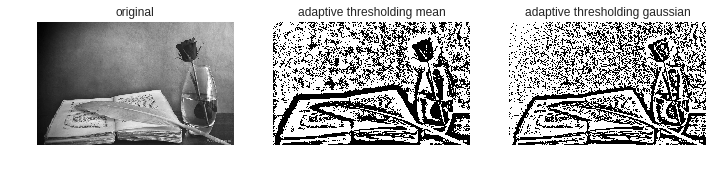

In [14]:
th1 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,115,2)
th2 = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,115,2)

plot_images([img1,th1,th2],["original","adaptive thresholding mean","adaptive thresholding gaussian"],3)

## Non local mean denoising

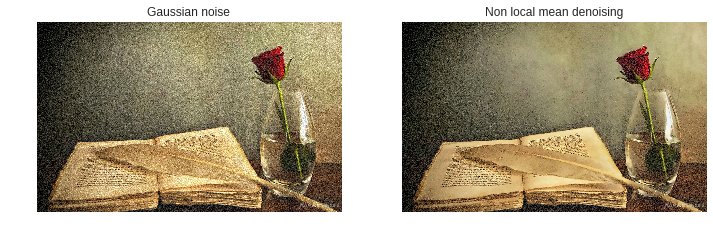

In [15]:
denoise = cv2.fastNlMeansDenoisingColored(gauss_noise,None,10,10,7,21)
plot_images([gauss_noise,denoise],["Gaussian noise","Non local mean denoising"],2)